# **Optimizing Online Sports Retail Revenue**

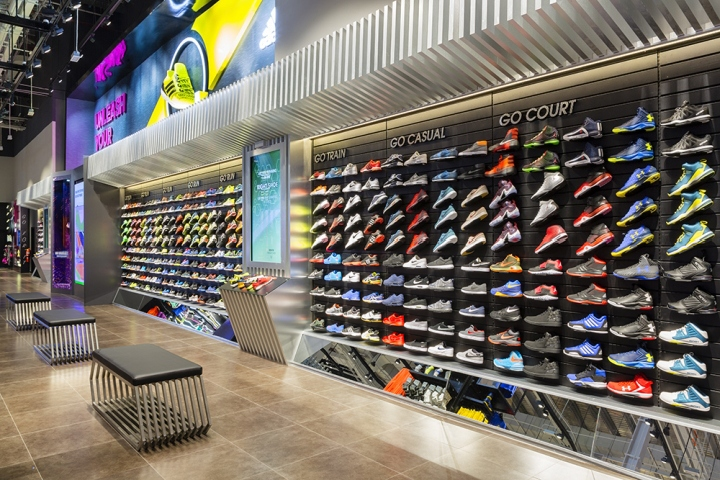

The market for sportswear and athleisure apparel is enormous, expected to be valued $193 billion in 2021 and to increase rapidly over the next ten years!

I'm pretending to be a product analyst for an online retailer selling athletic wear in this notebook. The business is particularly focused on finding ways to increase income. I will examine product information including costs, ratings, reviews, and descriptions as well as income and website traffic to generate suggestions for the marketing and sales teams.

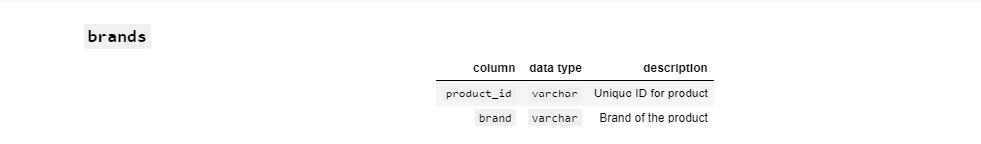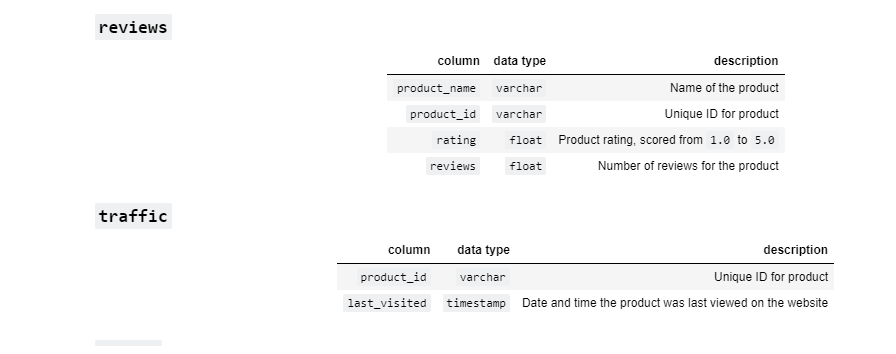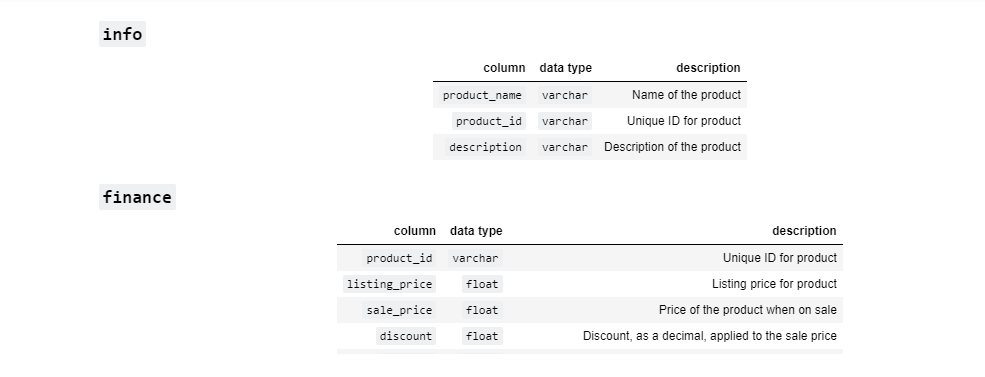

# **LIBERARIES**

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# **MERGE DATASETS**

In [ ]:
info = pd.read_csv("info.csv")
finance = pd.read_csv("finance.csv")
reviews = pd.read_csv("reviews.csv")
traffic = pd.read_csv("traffic.csv")
brands = pd.read_csv("brands.csv")

In [ ]:
merged_df = info.merge(finance, on="product_id", how="outer")
merged_df = merged_df.merge(reviews, on="product_id", how="outer")
merged_df = merged_df.merge(traffic, on="product_id", how="outer")
merged_df = merged_df.merge(brands, on="product_id", how="outer")

In [ ]:
merged_df.head()

,product_name,product_id,description,listing_price,sale_price,discount,revenue,rating,reviews,last_visited,brand
0,NaN,AH2430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-19 15:13:00,NaN
1,Women's adidas Originals Sleek Shoes,G27341,"A modern take on adidas sport heritage, tailor...",75.99,37.99,0.5,1641.17,3.3,24.0,2018-11-29 16:16:00,Adidas
2,Women's adidas Swim Puka Slippers,CM0081,These adidas Puka slippers for women's come wi...,9.99,5.99,0.4,398.93,2.6,37.0,2018-02-01 10:27:00,Adidas
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,"Inspired by modern tech runners, these women's...",69.99,34.99,0.5,2204.37,4.1,35.0,2018-09-07 20:06:00,Adidas
4,Women's adidas Originals Taekwondo Shoes,D98205,This design is inspired by vintage Taekwondo s...,79.99,39.99,0.5,5182.70,3.5,72.0,2019-07-18 15:26:00,Adidas


# **DATA EXPLORATION**

In [ ]:
merged_df.shape

(3179, 11)

In [ ]:
merged_df.info

<bound method DataFrame.info of                                           product_name  product_id  \
0                                                  NaN      AH2430   
1                 Women's adidas Originals Sleek Shoes      G27341   
2                    Women's adidas Swim Puka Slippers      CM0081   
3     Women's adidas Sport Inspired Questar Ride Shoes      B44832   
4             Women's adidas Originals Taekwondo Shoes      D98205   
...                                                ...         ...   
3174                   Nike Tiempo Legend 8 Academy TF  AT6100-606   
3175                             Nike React Metcon AMP  CT9155-063   
3176                                Air Jordan 8 Retro  CI1236-100   
3177                                   Nike Air Max 98  AH6799-300   
3178                                    Nike P-6000 SE  CJ9585-600   

                                            description  listing_price  \
0                                                   N

# **DATA PREPROCESSING**

In [ ]:
merged_df.dropna
merged_df.dropna(axis=0)

,product_name,product_id,description,listing_price,sale_price,discount,revenue,rating,reviews,last_visited,brand
1,Women's adidas Originals Sleek Shoes,G27341,"A modern take on adidas sport heritage, tailor...",75.99,37.99,0.5,1641.17,3.3,24.0,2018-11-29 16:16:00,Adidas
2,Women's adidas Swim Puka Slippers,CM0081,These adidas Puka slippers for women's come wi...,9.99,5.99,0.4,398.93,2.6,37.0,2018-02-01 10:27:00,Adidas
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,"Inspired by modern tech runners, these women's...",69.99,34.99,0.5,2204.37,4.1,35.0,2018-09-07 20:06:00,Adidas
4,Women's adidas Originals Taekwondo Shoes,D98205,This design is inspired by vintage Taekwondo s...,79.99,39.99,0.5,5182.70,3.5,72.0,2019-07-18 15:26:00,Adidas
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,Refine your interval training in these women's...,47.99,19.20,0.6,1555.20,1.0,45.0,2019-01-30 12:09:00,Adidas
...,...,...,...,...,...,...,...,...,...,...,...
3173,Air Jordan 5 Retro,CD2722-001,The Air Jordan 5 Retro for women gives a colou...,0.00,159.95,0.0,863.73,3.3,3.0,2018-03-31 10:10:00,Nike
3175,Nike React Metcon AMP,CT9155-063,The Nike React Metcon AMP takes the stability ...,0.00,139.95,0.0,251.91,3.0,1.0,2019-02-08 18:40:00,Nike
3176,Air Jordan 8 Retro,CI1236-100,The Air Jordan 8 Retro recaptures the memorabl...,159.95,127.97,0.0,230.35,5.0,1.0,2020-02-19 21:44:00,Nike
3177,Nike Air Max 98,AH6799-300,The Nike Air Max 98 features the OG design lin...,0.00,169.95,0.0,1223.64,4.0,4.0,2018-02-28 07:37:00,Nike


In [ ]:
merged_df.duplicated().sum()

0

# **1-Nike vs Adidas pricing**

I can see that there are 3,179 goods total in the database. Only one of the columns we previewed—last visited—has more than 5% of its values missing. Let's focus on pricing right now.

How do the price points of products from Nike and Adidas differ? By providing an answer, you can help us create a picture of the company's product line and target market. To create a distribution of the listing price and the count for each price, categorized by brand, we will perform a query.

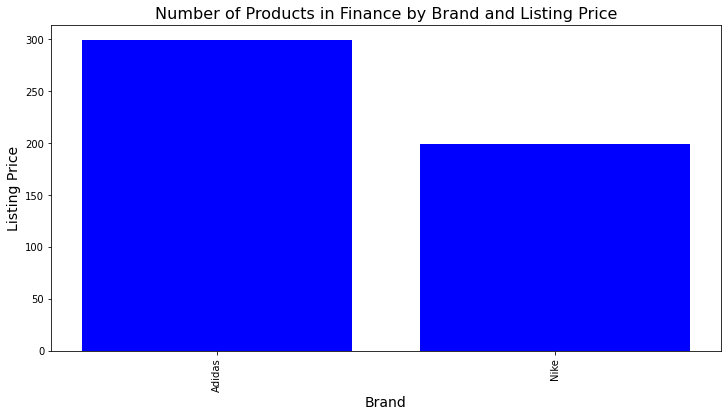

In [ ]:
finance = pd.read_csv('finance.csv')
brands = pd.read_csv('brands.csv')

merged_df = finance.merge(brands, on='product_id')

merged_df = merged_df[merged_df['listing_price'] > 0]


grouped = merged_df.groupby(['brand', 'listing_price'], as_index=False).count()


grouped.rename(columns={'product_id': 'count'}, inplace=True)


grouped['listing_price'] = grouped['listing_price'].astype(int)

grouped.sort_values(by='listing_price', ascending=False, inplace=True)


fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(grouped['brand'], grouped['listing_price'], width=0.8, color='blue')

# add labels and formatting to the chart
ax.set_xlabel('Brand', fontsize=14)
ax.set_ylabel('Listing Price', fontsize=14)
ax.set_title('Number of Products in Finance by Brand and Listing Price', fontsize=16)
ax.tick_params(axis='x', labelrotation=90)

# display the chart
plt.show()



# **2-Labeling price ranges**

It turns out that there are 77 different prices for the products in our database, which makes it challenging to interpret the results of our previous query.

Let's expand on our first question by categorizing by brand and label and giving labels to various pricing ranges. Also, we will publish the overall income for each brand and price range.

In [ ]:
class price_ranges:
    def __init__(self, finance_file, brands_file):
        self.finance_file = finance_file
        self.brands_file = brands_file
        
    def load_data(self):
        finance = pd.read_csv(self.finance_file)
        brands = pd.read_csv(self.brands_file)
        merged_df = finance.merge(brands, on='product_id', how='inner').dropna(subset=['brand'])
        merged_df['price_category'] = pd.cut(
            merged_df['listing_price'],
            bins=[-float('inf'), 42, 74, 129, float('inf')],
            labels=['Budget', 'Average', 'Expensive', 'Elite']
        )
        self.merged_df_data = merged_df
    
    def analyze_products(self):
        grouped = self.merged_df_data.groupby(['brand', 'price_category'], as_index=False).agg({'revenue': 'sum', 'product_id': 'count'})
        grouped.rename(columns={'product_id': 'count'}, inplace=True)
        grouped.sort_values(by='revenue', ascending=False, inplace=True)
        return grouped[['brand', 'count', 'revenue', 'price_category']]

def main():
    analyzer = price_ranges('finance.csv', 'brands.csv')
    analyzer.load_data()
    results = analyzer.analyze_products()
    print(results)

if __name__ == '__main__':
    main()


    brand  count     revenue price_category
2  Adidas    849  4626980.07      Expensive
1  Adidas   1060  3233661.06        Average
3  Adidas    307  3014316.83          Elite
0  Adidas    359   651661.12         Budget
4    Nike    357   595341.02         Budget
7    Nike     82   128475.59          Elite
6    Nike     90    71843.15      Expensive
5    Nike     16     6623.50        Average


## **3-Average discount by brand**

It's interesting to note that Adidas products produce greater overall revenue regardless of price category when we group things by brand and price range! The corporation can potentially enhance income by moving their stock to have a greater proportion of "Elite" Adidas products priced at least $129 because these products normally earn the highest revenue.

Notably, up until now, we have been focusing on listing price. It's possible that the listing price will differ from the final selling price of the item. Let's look at the discount, which is the percentage drop in the listing price when the product is really sold, to better comprehend revenue. If there is a difference in the amount of discount offered by different brands, it would be helpful to know.

In [ ]:
# Join the tables on the product_id column and filter out missing brands
merged_df = finance.merge(brands, on='product_id', how='inner').dropna(subset=['brand'])

# Calculate the average discount by brand
grouped = merged_df.groupby('brand')['discount'].mean() * 100

# Sort the results by average discount in ascending order
sorted_results = grouped.sort_values()

sorted_results 





brand
Nike       0.000000
Adidas    33.452427
Name: discount, dtype: float64

# **4-Correlation between revenue and reviews**

Oddly, Nike items don't get any discounts! Adidas products, in contrast, not only bring in the greatest money, but they are also deeply reduced!


The business can attempt to lower the Adidas product discount percentage and keep an eye on sales volume to see whether it stays consistent in order to boost income even more. As an alternative, it can consider providing a modest discount on Nike goods. This would lower the average income for these products, but it might raise revenue overall if more Nike products are sold.


Check now to see whether there are any linkages between the columns in our database. We will check the strength and direction of a correlation between revenue and reviews. the results shows a positive coorelation 

65.18512283481293


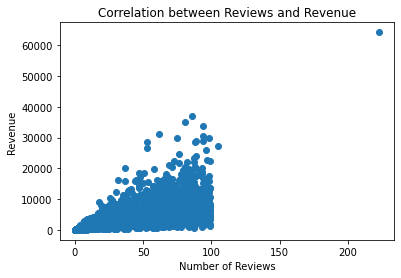

In [ ]:
# Join the tables on product_id
joined_data = pd.merge(reviews, finance, on="product_id")

# Calculate the correlation between reviews and revenue
review_revenue_corr = joined_data["reviews"].corr(joined_data["revenue"])

print((review_revenue_corr)*100)

plt.scatter(joined_data["reviews"], joined_data["revenue"])
plt.xlabel("Number of Reviews")
plt.ylabel("Revenue")
plt.title("Correlation between Reviews and Revenue")
plt.show()


# **5-Footwear product performance**

There is room to conduct tests aiming to enhance the volume of reviews in the other nine months because it appears that the first quarter of the calendar year has the biggest number of product reviews!

We have mostly compared Adidas vs. Nike products up to this point. Let's now turn our focus to the kinds of goods being sold. Although there are no labels for product types, we will develop a Common Table Expression (CTE) that filters description for keywords. From the findings, we can determine the percentage of footwear products in the company's stock as well as the median revenue these products earn.

Number of clothing products: 2700
Median clothing revenue: 3121.02


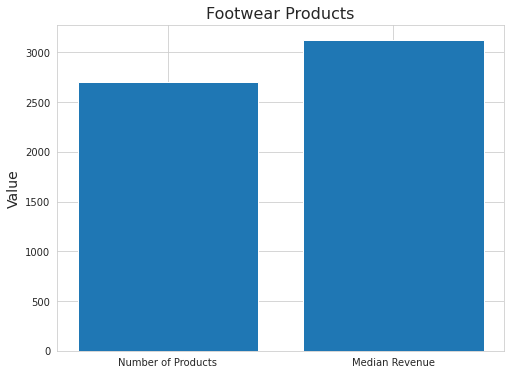

In [ ]:
# Define a subquery to select the descriptions and revenues of footwear products
footwear = info[(info['description'].str.contains('shoe|trainer|foot', case=False) & ~info['description'].isna())].merge(finance, on='product_id')[['description', 'revenue']]

# Calculate the number of footwear products and median revenue
num_footwear_products = footwear.shape[0]
median_footwear_revenue = footwear['revenue'].median()

print(f"Number of clothing products: {num_footwear_products}")
print(f"Median clothing revenue: {median_footwear_revenue}")

# Create a bar chart to visualize the number of footwear products and median revenue
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(['Number of Products', 'Median Revenue'], [num_footwear_products, median_footwear_revenue])
ax.set_title('Footwear Products', fontsize=16)
ax.set_ylabel('Value', fontsize=14)
plt.show()



# **6-Clothing product performance**

Remember from the first task that we discovered there are 3,117 products with complete description values. Of those, 2,700—or about 85% of the company's stock—are items of footwear. Also, they bring in a median annual income of about $3,000!

Although this is intriguing, there is no benchmark by which to judge if footwear's median revenue is excellent or bad in comparison to other goods. So let's look at how this differs from clothes products for our final task. In order to calculate the number of goods and median revenue of products that are not in footwear, we will reuse the footwear data and add a filter later.

Number of clothing products: 479
Median clothing revenue: 521.37


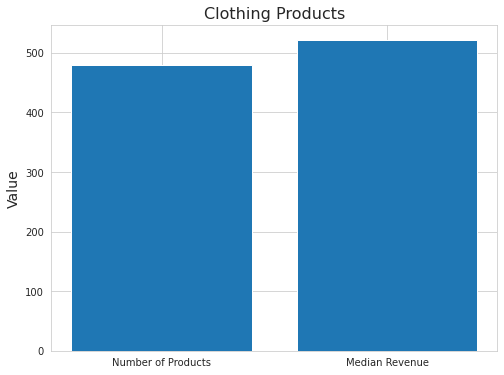

In [ ]:

clothing = info[(info['description'].str.contains('shoe|trainer|foot', case=False) & ~info['description'].isna())].merge(finance, on='product_id')[['description', 'revenue']]


num_clothing_products = info.merge(finance, on='product_id').loc[~info['description'].isin(clothing['description'].tolist())]['product_id'].count()
median_clothing_revenue = info.merge(finance, on='product_id').loc[~info['description'].isin(clothing['description'].tolist())]['revenue'].median()

# Print the number of clothing products and median revenue
print(f"Number of clothing products: {num_clothing_products}")
print(f"Median clothing revenue: {median_clothing_revenue}")
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(['Number of Products', 'Median Revenue'], [num_clothing_products , median_clothing_revenue])
ax.set_title('Clothing Products', fontsize=16)
ax.set_ylabel('Value', fontsize=14)
plt.show()

# **7-Add new Brands to the dataset**

Here is a for loop to add new items 'Puma,Under Armour and New Balance' to 'brands' dataset and append the new items to the dataset 

In [ ]:
brands = pd.read_csv('brands.csv')

new_brands = [['P15255', 'Puma'], ['R56378', 'Under Armour'], ['A78590', 'New Balance']]

for row in new_brands:
    brands = brands.append(pd.Series(row, index=brands.columns), ignore_index=True)

brands.to_csv('brands.csv', index=False)

print(brands)


      product_id         brand
0         AH2430           NaN
1         G27341        Adidas
2         CM0081        Adidas
3         B44832        Adidas
4         D98205        Adidas
...          ...           ...
3177  AH6799-300          Nike
3178  CJ9585-600          Nike
3179      P15255          Puma
3180      R56378  Under Armour
3181      A78590   New Balance

[3182 rows x 2 columns]


<ipython-input-15-03209891b44e>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  brands = brands.append(pd.Series(row, index=brands.columns), ignore_index=True)
<ipython-input-15-03209891b44e>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  brands = brands.append(pd.Series(row, index=brands.columns), ignore_index=True)
<ipython-input-15-03209891b44e>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  brands = brands.append(pd.Series(row, index=brands.columns), ignore_index=True)


# **Discussion**

To sum up This project i've covered most the topics i have learned in this modules to analyizze the data.After merging the data from diffrent datasets and do some data cleaning and data exploratory.With the postitive co-orelation between reviews and revenue. plus showing clothing and footwear performance and the median of revenue is in increase. we can see which brand is the most selling 'Nike and 'Addidas' to see our top brands. we can see the average prices of our products and the average discount  after some analysis we see that the company is on the right track

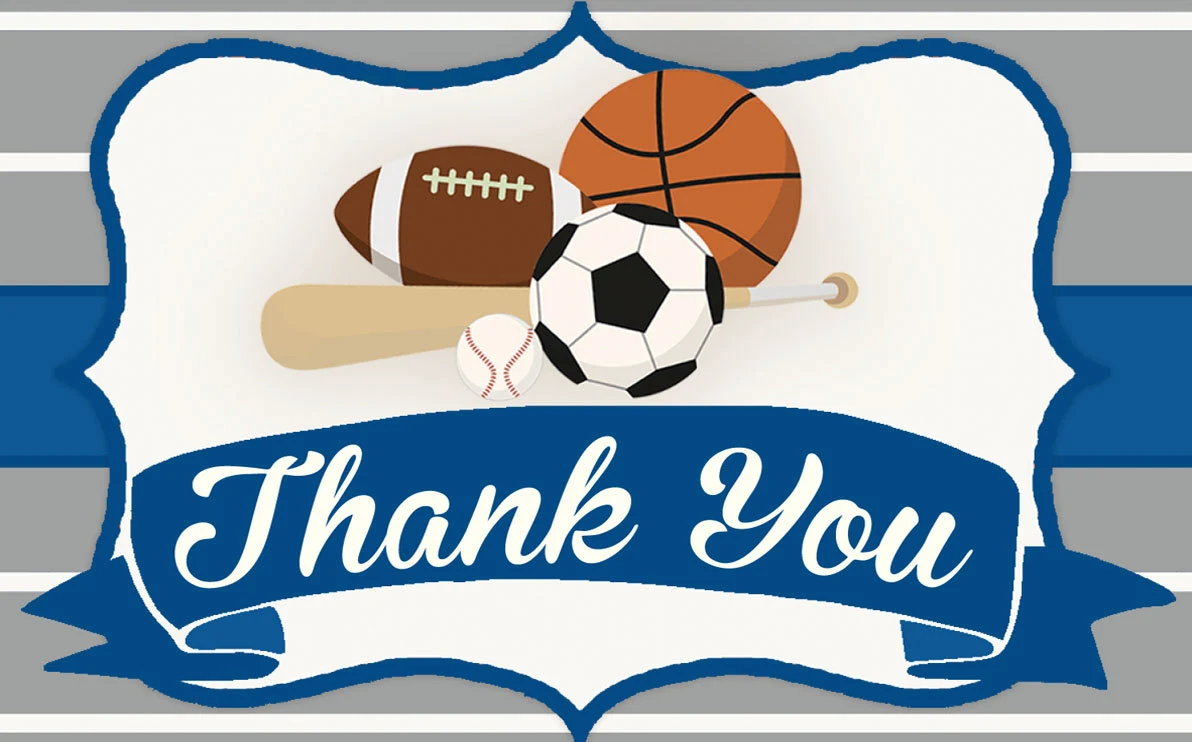